In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetabless/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetabless/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetabless/Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 358 files belonging to 36 classes.


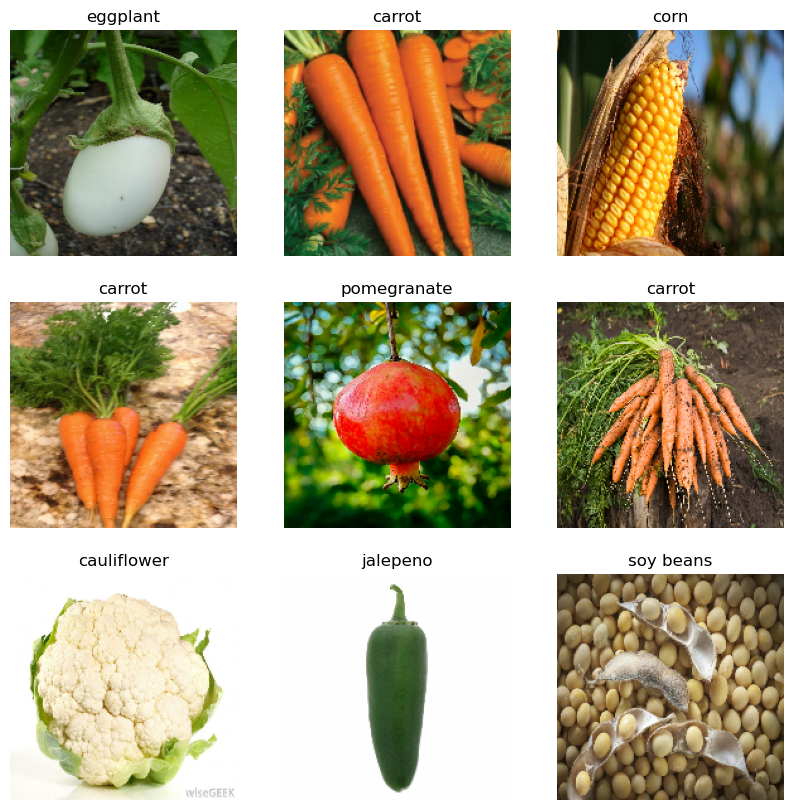

In [17]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential

In [21]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 8
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 808ms/step - accuracy: 0.0935 - loss: 3.4425 - val_accuracy: 0.3333 - val_loss: 2.2355
Epoch 2/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 783ms/step - accuracy: 0.2875 - loss: 2.4211 - val_accuracy: 0.5100 - val_loss: 1.7305
Epoch 3/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 782ms/step - accuracy: 0.4261 - loss: 1.9592 - val_accuracy: 0.6866 - val_loss: 1.0991
Epoch 4/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 768ms/step - accuracy: 0.5485 - loss: 1.5113 - val_accuracy: 0.8177 - val_loss: 0.7187
Epoch 5/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 779ms/step - accuracy: 0.6861 - loss: 1.0836 - val_accuracy: 0.9031 - val_loss: 0.4165
Epoch 6/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 780ms/step - accuracy: 0.8279 - loss: 0.6150 - val_accuracy: 0.9174 - val_loss: 0.4036
Epoch 7/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 784ms/step - accuracy: 0.8980 - loss: 0.3660 - val_accuracy: 0.9373 - val_loss: 0.3001
Epoch 8/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 762ms/step - accuracy: 0.9329 - loss: 0.2403 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

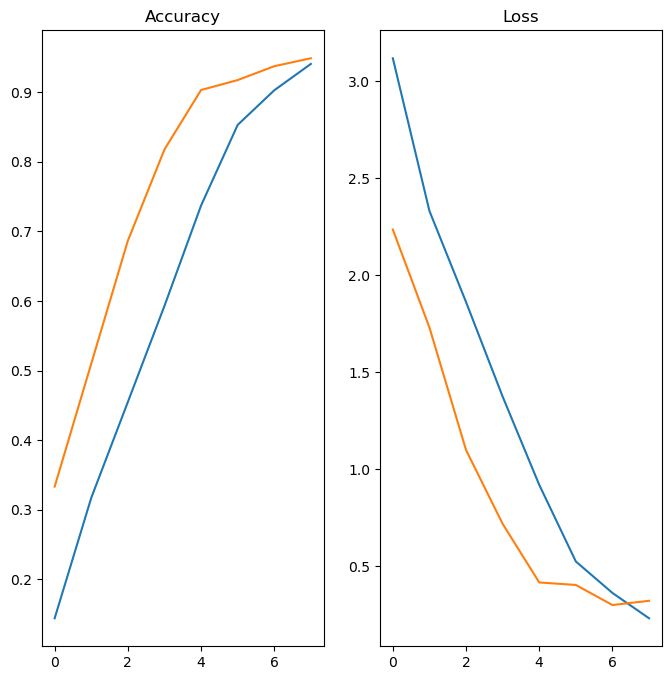

In [28]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [43]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [45]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [47]:
score = tf.nn.softmax(predict)

In [49]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 94.21


In [53]:
model.save('Image_classify.keras')